# Проект A/B тестирование

## Описание цели исследования

Проверить результаты проведенного А/В тестирования и определить присутствует ли улучшение метрики на 10%

## План исследования

1. Подготовительный этап.\
    1.1 Импорт необходимых библиотек\
    1.2 Загрузка данных в переменные\
    1.3 Ознакомление с данными\
    1.4 Выводы по разделу

2. Предобработка данных\
    2.1 Приведение данных к соответствующим типам\
    2.2 Исследование пропусков и дубликатов\
    2.3 Выводы по разделу

3. Оценка корректности проведение теста\
    3.1 Изучение соответствия данных требованиям технического задания. Проверить корректность всех пунктов ТЗ\
    3.2 Проверка соответствия времени проведения теста маркетинговым и  другим активностям\
    3.3 Проверка пересечения с конкурирующими тестами и пересечение аудитории в тестах друг с другом.\
    3.4 Проверка на равномерность распределения по тестовым группам и правильность их формирования\
    3.5 Выводы по разделу

4. Исследовательский анализ данных\
    4.1 Количество событий на пользователя одинаково распределены в выборках?\
    4.2 Как число событий в выборках распределено по дням?\
    4.3 Как меняется конверсия в воронке в выборках на разных этапах?\
    4.4 Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?\
    4.5 Выводы по разделу

5. Оценка результатов А/В-тестирования\
    5.1 Что можно сказать про результаты A/В-тестирования?\
    5.2 Проверьте статистическую разницу долей z-критерием.\
    5.3 Выводы по разделу

6.  Общие выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Заключение о корректности проведения теста.


## Подготовительный этап

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import scipy.stats as st
from statsmodels. stats.proportion import proportions_ztest
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings

### Загрузка данных в переменные

In [2]:
# Используется конструкция try except для избегания ошибок при разночтении маршрутов загрузки исходных данных
# Данные из исходный файлов загружаем в соответствующие названиям переменные
try:
    ab_project_marketing_events = pd.read_csv('./datasets/ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('./datasets/final_ab_new_users.csv')
    final_ab_events = pd.read_csv('./datasets/final_ab_events.csv')
    final_ab_participants = pd.read_csv('./datasets/final_ab_participants.csv')
except:
    ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
    final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')

### Ознакомление с данными

#### Ознакомление с final_ab_events

В данных final_ab_events хранятся действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

In [3]:
# Вывод первых десяти строк методом head с аргументом 10
final_ab_events.head(10)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


В датасете *final_ab_events* видно наличие структурированных данных в четырех столбцах

In [4]:
# Вывод общей информации о датасете final_ab_events методом info
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Структура файла, по информации от заказчика:\
user_id — идентификатор пользователя;\
event_dt — дата и время события;\
event_name — тип события;\
details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

Всего в датасете 440317 строк и четыре столбца с данными.\
Формат данных в столбце event_dt не соответствуют назначению. Требуется конвертация в надлежащий  тип данных.

В столбце details присутствуют пропуски, требующие изучения и при необходимости заполнения.


#### Ознакомление с ab_project_marketing_events

ab_project_marketing_events — календарь маркетинговых событий на 2020 год.

In [5]:
# Вывод первых десяти строк дадасета ab_project_marketing_events методом head и аргументом 10
ab_project_marketing_events.head(10)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


В датасете *ab_project_marketing_events* видно наличие структурированных данных в четырех столбцах

In [6]:
# Вывод общей информации о датасете ab_project_marketing_events методом info
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


Структура файла по данным от заказчика:\
name — название маркетингового события;\
regions — регионы, в которых будет проводиться рекламная кампания;\
start_dt — дата начала кампании;\
finish_dt — дата завершения кампании.

Всего в датасете 14 строк и четыре столбца с данными.
Формат данных в столбце start_dt и finish_dt не соответствуют назначению. Требуется конвертация в надлежащий  тип данных.

Пропуски в данных не обнаружены.

#### Ознакомление с final_ab_new_users

final_ab_new_users - пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года.


In [7]:
# Вывод первых десяти строк дадасета final_ab_new_users методом head и аргументом 10
final_ab_new_users.head(10)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


В датасете *final_ab_new_users* видно наличие структурированных данных в четырех столбцах

In [8]:
# Вывод общей информации о датасете final_ab_new_users методом info
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


Структура файла по данным заказчика:\
user_id — идентификатор пользователя;\
first_date — дата регистрации;\
region — регион пользователя;\
device — устройство, с которого происходила регистрация.

Всего в датасете 61733 строк и четыре столбца с данными.\
Формат данных в столбце first_date не соответствуют назначению. Требуется конвертация в надлежащий тип данных.

Пропусков в данных не обнаружены.

#### Ознакомление с final_ab_participants

final_ab_participants — таблица участников тестов.

In [9]:
# Вывод первых десяти строк дадасета final_ab_participants методом head и аргументом 10
final_ab_participants.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test
7,C46FE336D240A054,A,recommender_system_test
8,92CB588012C10D3D,A,recommender_system_test
9,057AB296296C7FC0,B,recommender_system_test


В датасете *final_ab_new_users* видно наличие структурированных данных в трех столбцах

In [10]:
# Вывод общей информации о датасете final_ab_participants методом info
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


Структура файла по данным заказчика:\
user_id — идентификатор пользователя;\
ab_test — название теста;\
group — группа пользователя.

Всего в датасете 18268 строк и три столбца с данными.\
Формат всех данных соответствуют назначению.

Пропусков в данных не обнаружено.

### Выводы по разделу

Всего было получено 4 файла в формате csv:
- ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год;
- final_ab_new_users.csv — пользователи, зарегистрировавшиеся с 7 до 21 декабря 2020 года;
- final_ab_events.csv — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;
- final_ab_participants.csv — таблица участников тестов.

Данные из файлов были имитированы в переменные с соответствующими наименованиями.\
Для начала был произведён обзор полученных данных, в результате чего было выявлено несоответствие значений в данных типам их назначения. Данная проблема была обнаружена практически во всех таблицах, кроме final_ab_participants.\
При первичном обзоре пропуски были обнаружены только в данных final_ab_events.\
В седлающем разделе будет проведена работа с исправлением обнаруженных ошибок.




## Предобработка данных

### Приведение данных к соответствующим типам

Приведем все обнаруженные несоответствия значений дат и времени к корректному типу данных

In [11]:
# Для изменения формата даты и время используется функцию to_datetime из библиотеки pandas, 
# в которую передадаются данные из столбцов с датой по каждому датасету отдельно, но с небольшими разницами в аргументах.

# Изменение формата даты и времени столбца 'event_dt' датасета final_ab_events. Аргументу format передаются значения 
# Год-месяц-день час-минута-секунда ('%Y-%m-%d %H:%M:%S'), а также округляем время до 00:00:00 ч. методом normalize
# библиотеки datetime:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'], format='%Y-%m-%d %H:%M:%S').dt.normalize()

# Изменение формата столбца 'start_dt' датасета ab_project_marketing_events. Агрументу format передается '%Y-%m-%d'
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'], format='%Y-%m-%d')

# Изменение формата столбца 'finish_dt' датасета ab_project_marketing_events. Агрументу format передается '%Y-%m-%d'
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'], format='%Y-%m-%d')

# Изменение формата столбца 'first_date' датасета final_ab_new_users. Агрументу format передается '%Y-%m-%d'
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'], format='%Y-%m-%d')

Проверка внесенных изменений методом *info* 

In [12]:
final_ab_events.info()
print()
ab_project_marketing_events.info()
print()
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 6173

### Исследование пропусков и дубликатов

Как было выявлено на этапе ознакомления с данными, в единственной таблице final_ab_new_users обнаружены пропуски в данных details.\
Для начала необходимо ознакомится с данными в этих столбцах.

In [13]:
# Подсчет количества пропусков значений столбца 'details' датасета final_ab_events производится сочетанием методов
# isna().sum(), котрые в качестве конструкции передаются в f-строку:
f'Количество пропусков в столбце details: {final_ab_events["details"].isna().sum()}'

'Количество пропусков в столбце details: 377577'

Изучим данные пропуски.\
В первую очередь, посчитаем количество уникальных значений в строках всех столбцов датасета:

In [14]:
# Для подсчета использован метод nunique, ко всему датасету final_ab_events
final_ab_events.nunique()

user_id       58703
event_dt         24
event_name        4
details           4
dtype: int64

Из полученных сведений видно, что в датасете 58703 уникальных пользователя, у которых 24 уникальные даты, 4 уникальных вида событий и 4 варианта детализированных данных.

Проверим уникальные наименования типов событий (event_name) в датасете:

In [15]:
# Используется тот же метод unique, но у же конкретно к столбцу 'event_name'
final_ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Как следует из названий, это наименования действий в событийной воронке.\
Сделаем два среза по пропускам в details и посмотрим, какие события воронки соответствуют им.

In [16]:
# Используется логический срез методом query, в которым задаётся логическое значение 'details.isna()', 
# формирующее датасет с пустым значением столбца 'details'
# В полученном срезе к столбцу 'event_name' применяется метод unique, который выведет все уникальные значения.
final_ab_events.query('details.isna()')['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

In [17]:
# Используется также логический срез методом query, только в нем задаётся логическое значение '~details.isna()', 
# что сформирует обратный срез, в котором 'details' будут все значения, кроме пустых
# В полученном срезе к столбцу 'event_name' также применяется метод unique, который выведет все уникальные значения.
final_ab_events.query('~details.isna()')['event_name'].unique()

array(['purchase'], dtype=object)

Как видим, что пропуски в details попадают на события, которые не связаны с покупками. По этой причине, когда покупка еще не совершается, никакой записи в details не делается. Это может означать только одно, учитывая формат данных столбца details (float64), можно с уверенностью утверждать, то это записи о сумме приобретения товаров.\
Исходя из полученных сведений, можно сделать вывод о том, что пропуски заполнять не следует.

#### Обзор датасетов на предмет абсолютных пропусков:

Перед обзором абсолютных пропусков в датасете, приведем значения в *'regions'* и *'name'* датасета *ab_project_marketing_events* к нижнему регистру. Только в нем было обнаружено несоответствие правилам хорошего тона регистрация данных в указанных столбцах.

In [18]:
# В данном случае, к столбцу 'regions' датасета ab_project_marketing_events применяется метод str.lower, который переведет 
# все буквы в данных построчно к нижнему регистру
ab_project_marketing_events['regions'] = ab_project_marketing_events['regions'].str.lower()

# Также переводится к нижнему регистру данные из столбца 'name'
ab_project_marketing_events['name'] = ab_project_marketing_events['name'].str.lower()
ab_project_marketing_events.head(10)

,name,regions,start_dt,finish_dt
0,christmas&new year promo,"eu, n.america",2020-12-25,2021-01-03
1,st. valentine's day giveaway,"eu, cis, apac, n.america",2020-02-14,2020-02-16
2,st. patric's day promo,"eu, n.america",2020-03-17,2020-03-19
3,easter promo,"eu, cis, apac, n.america",2020-04-12,2020-04-19
4,4th of july promo,n.america,2020-07-04,2020-07-11
5,black friday ads campaign,"eu, cis, apac, n.america",2020-11-26,2020-12-01
6,chinese new year promo,apac,2020-01-25,2020-02-07
7,labor day (may 1st) ads campaign,"eu, cis, apac",2020-05-01,2020-05-03
8,international women's day promo,"eu, cis, apac",2020-03-08,2020-03-10
9,victory day cis (may 9th) event,cis,2020-05-09,2020-05-11


Как видно, функция str.lower исправила регистр значений в столбцах *'name'* и *'regions'*, что позволит в дальнейшем  выявить возможные неявные дубликаты строк.

Проверим все датасеты на предмет абсолютных пропусков.

In [19]:
# В данном случае f-строки используются для вывода результатов применения комбинированных методов duplicated и sum.
# Метод duplicated определит дубликаты строк, а sum произведет их подсчет.
print( f'Количество абсолютных дубликатов в ab_project_marketing_events: {ab_project_marketing_events.duplicated().sum()}')
print( f'Количество абсолютных дубликатов в final_ab_new_users: {final_ab_new_users.duplicated().sum()}')
print( f'Количество абсолютных дубликатов в final_ab_events: {final_ab_events.duplicated().sum()}')
print( f'Количество абсолютных дубликатов в final_ab_participants: {final_ab_participants.duplicated().sum()}')

Количество абсолютных дубликатов в ab_project_marketing_events: 0
Количество абсолютных дубликатов в final_ab_new_users: 0
Количество абсолютных дубликатов в final_ab_events: 2
Количество абсолютных дубликатов в final_ab_participants: 0


Произведем удаление дублирующих строк в датасете *final_ab_events*

In [20]:
# Для удалеия дубликатов строк применяется метод drop_duplicates к датасету в целом, при этом,
# метод оставляет первые строки из дублей, а повторные удаляет. Тем самым, обеспечивая сохранность 
# только уникальных строк:
final_ab_events = final_ab_events.drop_duplicates()
print( f'Количество дубликатов после метода drop_duplicates в final_ab_events: {final_ab_events.duplicated().sum()}')

Количество дубликатов после метода drop_duplicates в final_ab_events: 0


По результатам обзора датасетов, было выявлено только два дубля строк в датасете final_ab_events. После применения метода очистки дублей *drop_duplicates*, данный недочет был устранен.

### Выводы по разделу.

В результате обработки полученных данных, были приведены в соответствие типы значений в таблицах *final_ab_events*, *ab_project_marketing_events* и *final_ab_new_users*. Также приведены значения в *'regions'* и *'name'* датасета *ab_project_marketing_events* к нижнему регистру, в соответствии с правилами хорошего тона. И в заключении проведена проверка всех датасетов на абсолютные дубликаты и очистка от дублей в *final_ab_events*.\
В результате предобработки, не было утрачено ни одной строки из всех датасетов.


## Оценка корректности проведения теста

В данном разделе проведем изучение соответствия данных требованиям технического задания. Для этого, проверим корректность всех пунктов на его соответствие.

### Проверка пересечения пользователей между конкурирующими тестами

Для начала сделаем обзор тестов в датасете *final_ab_participants*

In [21]:
# Для выполнеия запроса, используется метод unique к столбцу ab_test датасета final_ab_participants
final_ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

Всего два теста. Их конкуренция и влияние друг на друга не установлено. По данным заказчика, мы должны исследовать результаты *recommender_system_test*. Поэтому, удалим конкурирующий тест из датасета.

In [22]:
# Для выполения данной задачи использован метод логического среза query, 
# где задатеся логическое соотвествие ab_test == "recommender_system_test
final_ab_participants=final_ab_participants.query('ab_test == "recommender_system_test"')

# Для проверки выполнения задачи производится вызов метода unique к столбцу ab_test
final_ab_participants['ab_test'].unique()

array(['recommender_system_test'], dtype=object)

Датасет очищен от конкурирующего теста. В нем остались только исследуемые данные, относящиеся к *recommender_system_test*

### Проверка пересечения уникальных пользователей внутри изучаемого теста.

Для проверки пересечений пользователей между тестами, сгруппируем данные в датасете *final_ab_participants* по id пользователя и посчитаем сколько раз пользователь учувствует в пересекающихся тестируемых группах "А" и "В"

In [23]:
# Для подсчета используются сводные данные методом pivot_table, где за индекс берется 'user_id', колонками
# определяются группы тестирования ('group'), а подсчет значений берется из 'ab_test' методом 'count' в 
# агрегирующей функции aggfunc. Все данные записываются в переменную duble_group_test
duble_group_test=final_ab_participants.pivot_table(index='user_id', columns='group', values='ab_test', aggfunc='count')

# Далее перезаписывается переменная duble_group_test логическим срезом методом query, где выбирается логическая цепочка
# при которой выполняется условие наличия пользователя в обеих тестируемых группах 'A > 0 and B > 0'. В заключении
# обновляется индексация датафрейма duble_group_test, методом reset_index
duble_group_test=duble_group_test.query('A > 0 and B > 0').reset_index()

# Вывод получившихся результатов
duble_group_test

group,user_id,A,B


Как видим, пересечений участия одного и того же пользователя в тестируемой и контрольной группах, не выявляется, что позитивно влияет на дальнейшие результаты исследования.

### Проверка данных на соответствии ТЗ датам запуска, окончания набора новых пользователей и окончание теста

Перед началом выполнения проверки, зададим переменные с указанными датами, которые в дальнейшем будем использовать в работе.

In [24]:
# Задается начальное значение начала тестирования start_test с применением метода date из библиотеки datetime
start_test = dt.date(2020, 12, 7)

# Задается начальное значение остановки набора пользователей в тестируемые группы,
# с применением метода date из библиотеки datetime
end_test = dt.date(2021,1,4)

# Задается дата остановки теста stop_recruiting с применением метода date из библиотеки datetime:
stop_recruiting = dt.date(2020,12,21)

# Вывод внедренных переменных с помощью f-строк
print(f' Период тестирования c {start_test} по  {end_test}')
print(f' Дата остановки набора новых пользователей: {stop_recruiting}')

 Период тестирования c 2020-12-07 по  2021-01-04
 Дата остановки набора новых пользователей: 2020-12-21


#### Обзор датасета *final_ab_events* на соответствие датам ТЗ

Проверим все данные на предмет активностей и пр. событий, произошедших в период проведения тестирования с 2020-12-07 по 2021-01-04. 

In [25]:
# Проверка делается при помощи вывода min и max значений в столбце 'event_dt' датасета final_ab_events
# и выводятся результаты при использовании f-строк:
print(f'Минимальная дата в датасете: {final_ab_events["event_dt"].min()}')
print(f'Максимальная дата в датасете: {final_ab_events["event_dt"].max()}')


Минимальная дата в датасете: 2020-12-07 00:00:00
Максимальная дата в датасете: 2020-12-30 00:00:00


Напомним, что датасет *final_ab_events* отвечает за сбор активности новых пользователей. Начальная дата датасета совпадает с началом тестирования, по этой причине, все стартовые записи соответствует требованиям. Тест закончился 04.01.2021, это означает, что любая активность превышающая эту дату, не должна попасть в анализ.\
Однако в датасете отсутствуют данные об активности пользователей в период с 2020-12-30 по 2021-01-04. Возможно это связано с закрытием магазина на новогодний период.

Отсечку по дате окончания теста, все же устаноим.

In [26]:
# Использован метод логической фильтрации методом query, в который переданы условия 'event_dt <= @end_test',
# а также произведена перезапись датафрейма final_ab_events с уже очищенными данными.
final_ab_events = final_ab_events.query('event_dt <= @end_test')


#### Обзор датасета *ab_project_marketing_events* на соответствие датам ТЗ 

Посмотрим, какие маркетинговые акции действовали в период тсестирования.

Для начала отфильтруем все маркетинговые акции которые коснулись региона EU, т.к. требования ТЗ указывают на исследования в данном регионе.

In [27]:
# Используется метод логической фильтрации с применением функции loc, которая обращается к 
# ab_project_marketing_events['regions']. В части логического условия используется набор функций str.contains,
#  Которым передается параметр части строки eu, чувствительность к регистру задан case=False и использование 
# регулярного выражения regex=True:
region_promo = ab_project_marketing_events.loc[ab_project_marketing_events['regions']
                                               .str.contains('eu', case=False, regex=True)]

# Проверка результата логической фильтрации:
region_promo['regions'].unique()

array(['eu, n.america', 'eu, cis, apac, n.america', 'eu, cis, apac'],
      dtype=object)

Проверим все события, когда дата промоакция началась раньше или в день начала теста, но закончилась раньше или в день окончания теста или когда акция началась позже или в день начала теста, а закончится могла позже окончания теста. В данном случае буду выведены все промоакции при различных условиях их страта и окончания. При этом в выбор попадают только те промокации, которые могли относится к региону EU:

In [28]:
#  Для вывода используеся метод логической фильтрации с применением функции query и двумя параметрами 
# условий по временным интервалам
region_promo.query(('start_dt >= @start_test and finish_dt <= @end_test') 
                   or ('start_dt <= @start_test and finish_dt >= @end_test') )

,name,regions,start_dt,finish_dt
0,christmas&new year promo,"eu, n.america",2020-12-25,2021-01-03


В период проведения A/B тестирования, проходила маркетинговая акция *christmas&new year promo* которая коснулась региона *eu*. Однозначного вывода о том как влияет проведение акции на результаты тестирования, нет. Данное обстоятельство требует отдельного обзора.

#### Обзор датасета  final_ab_new_users на соответствие датам ТЗ

Проверим пеириод регистрации пользователей в датасете

In [29]:
# Используется вывод с помощью f-строки функций min и max по данным из final_ab_new_users["first_date"]
print(f' Начальная дата в данных: {final_ab_new_users["first_date"].min()}')
print(f' Конечная дата в данных: {final_ab_new_users["first_date"].max()}')

 Начальная дата в данных: 2020-12-07 00:00:00
 Конечная дата в данных: 2020-12-23 00:00:00


Т.к. в ТЗ был указан период набора пользователей с 2020-12-07 по 2020-12-21, то данные превышающие эту дату будут лишними и требуют их удаления.

In [30]:
# Перезапись датасета final_ab_new_users данными после логической фильтрации с использованием метода query и условия, 
# которое задает ограничение first_date меньше или равно переменной stop_recruiting:
final_ab_new_users = final_ab_new_users.query('first_date <= @stop_recruiting')

# Проверка максимальной даты first_date функцией max:
final_ab_new_users["first_date"].max()

Timestamp('2020-12-21 00:00:00')

Как видно, данные соответствуют условиям ТЗ.\
Подсчитаем, сколько уникальных пользователей осталось в датасете после его усечения.

In [31]:
final_ab_new_users['user_id'].nunique()

56470

Данные были очищены, результат вполне приемлим.

#### Обзор датасета  final_ab_participants на соответствие датам ТЗ

***!!ПРОВЕРИТЬ НЕОБХОДИМОСТЬ ДАННОЙ ПРОВЕРКИ!!***

In [32]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6701 non-null   object
 1   group    6701 non-null   object
 2   ab_test  6701 non-null   object
dtypes: object(3)
memory usage: 209.4+ KB


В данном датасете временных параметров данных нет.

### Аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU

Проверим количество новых пользователей из региона EU, котрые попадут в тестирование, а так же посчитаем какой процент от их общего клоичества попадет в тестовые группы.\
Для начала оценим, пользователи из каких регионов присутсвуют в датасете.

In [33]:
# Использован метод unique, для отбора уникальных значений столбца 'region'
final_ab_new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

Всего четыре региона содержатся в записях датасета final_ab_new_users, один из них нас интересующий.

Создадим срез всех новых пользователей из региона EU и запишем в переменную *eu_users*

In [34]:
# Используется метод логической фильтрации, когда отбор строк из столбца 'region' соответствующий значению EU, выбирается
# из датасета, при этом необходимо не забывать чувствительность к регистру условий фильтрации:
eu_users = final_ab_new_users[final_ab_new_users["region"]== "EU"]

# вывод уникальных значений методом unique
eu_users['region'].unique()

array(['EU'], dtype=object)

Иных строк, кроме содержащих регион EU в датасете *eu_users*, не обнаружено  

In [35]:
# Вывод результатов подсчета количества записей уникальных пользователей, полученных методом nunique:
f' Всего пользователей из EU: {eu_users["user_id"].nunique()}'

' Всего пользователей из EU: 42340'

Для подсчета количества пользователей, принимающих участие в тесте *recommender_system_test*, создадим срез в final_ab_participants и запишем его в переменную user_id_test

In [36]:
# Применяется я логическая фильтрация методом query с логическим условием, где данные из ab_test должны соответствовать 
# значению recommender_system_test:
user_id_test=final_ab_participants.query('ab_test == "recommender_system_test"')

# Вывод результатов фильтрации:
user_id_test

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


Произведем подсчет количества уникальных пользователей, учавствующих в *recommender_system_test* за указанный период и результат запишем в переменную eu_user_test

In [37]:
# Используется метод логической фильтрации к датасету eu_users по условию, которое определяет значения eu_users['user_id'],
# соответствуют значениям user_id_test['user_id']. Подсчет произведём методом nunique:
eu_user_test=eu_users[eu_users['user_id'].isin(user_id_test['user_id'])]['user_id'].nunique()

# Вывод результата подсчёта:
f' Всего пользователей из EU, принявших участие в тесте "recommender_system_test": {eu_user_test}'

' Всего пользователей из EU, принявших участие в тесте "recommender_system_test": 6351'

Произведем подсчет % аудитории из региона EU, принявших участие в тете *recommender_system_test*, к общему числу пользователей из данного региона:

In [38]:
print('Процент аудитории из EU: {:.2%}'.format(eu_user_test / eu_users["user_id"].nunique()))

Процент аудитории из EU: 15.00%


В выборку попала требуемое количество пользователей из региона EU, что соотвествует ТЗ

В выборку попали пользователи из других регионов, что может помешать проведению теста. От данных записей избавимся в основном датасете *final_ab_new_users*

In [39]:
# Перезапись датасета final_ab_new_users после логической фильтрации методом query в котором задано условие, 
# что region == "EU":
final_ab_new_users = final_ab_new_users.query('region == "EU"')

# Проверка уникальных значений 'region' методом unique после усечения датасета final_ab_new_users:
final_ab_new_users['region'].unique()

array(['EU'], dtype=object)

В результате обработки данных в final_ab_new_users, в нем остались записи относящиеся только к региону EU

### Проверка на соответствие ТЗ о ожидаемом количестве участников теста: 6000.

Проверим, сколько уникальных участников теста осталось, после обработки данных:

In [40]:
# Используется метод логической фильтрации query и метод подсчета уникальных значений nunique
final_ab_participants.query('ab_test == "recommender_system_test"')['user_id'].nunique()

6701

Количество пользователей участвующих в тесте, соответствует требованиям ТЗ

### Проверка на соотвествие ТЗ лайфтайма в 14 дней

Необходимо отбросить всю активность пользователя спустя 14 дней после регистрации. Для начала, составим список первого дня события всех пользователей и запишем в переменную *first_dt*.

In [41]:
# Для начала произведена сортировка по возрастанию данных методом sort_values по значениям в столбце 'event_dt' 
# датафрейма final_ab_events, после чего проведена группировка данных полученного датафрейма по столбцу 'user_id'.
# В процессе группировки применяется метод выборки данных с помощью метода agg, которому передается аргумент first
# для столбца 'event_dt', что в последствии отбирает только первые значения 'event_dt' по каждому пользователю:
first_dt = final_ab_events.sort_values(by='event_dt').groupby(['user_id'], as_index=False)\
    .agg({'event_dt' : 'first'})\
    .rename(columns={'event_dt':'first_dt'}) # переименовывается название колонки 'event_dt' в 'first_dt'

# Выводится полученная таблица с данными первой активности пользователей
first_dt

,user_id,first_dt
0,0001710F4DDB1D1B,2020-12-14
1,000199F1887AE5E6,2020-12-14
2,0002499E372175C7,2020-12-22
3,0002CE61FF2C4011,2020-12-07
4,000456437D0EFFE1,2020-12-15
...,...,...
58698,FFF7A7BAF44FE9B4,2020-12-19
58699,FFF8FDBE2FE99C91,2020-12-20
58700,FFF91B6C5431F375,2020-12-14
58701,FFFAB034A09DCC28,2020-12-18


Объединим журнал событий пользователей *final_ab_events* c *first_dt* по *user_id*. Тем самым получим датафрейм с данными о событиях и регистром первого дня активности.

In [42]:
# Объединение датасетов final_ab_events и first_dt производится методом merge с аргументами how='left' и по общему столбцу 
# 'user_id'. В завершении производится перезапись final_ab_events по уже объединенным данным:
final_ab_events = final_ab_events.merge(first_dt, how='left', on='user_id')

# Вывод полученных результатов после объединения:
final_ab_events

,user_id,event_dt,event_name,details,first_dt
0,E1BDDCE0DAFA2679,2020-12-07,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07,purchase,9.99,2020-12-07
2,9CD9F34546DF254C,2020-12-07,purchase,4.99,2020-12-07
3,96F27A054B191457,2020-12-07,purchase,4.99,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07,purchase,4.99,2020-12-07
...,...,...,...,...,...
440310,245E85F65C358E08,2020-12-30,login,NaN,2020-12-07
440311,9385A108F5A0A7A7,2020-12-30,login,NaN,2020-12-07
440312,DB650B7559AC6EAC,2020-12-30,login,NaN,2020-12-07
440313,F80C9BDDEA02E53C,2020-12-30,login,NaN,2020-12-07


Вычислим лайфтайм каждого события, относительно первого дня активности пользователя.

In [43]:
# Для вычислений используется метод days из библиотеки datetime, который обработает разность между датами из 'event_dt'
# и 'first_dt'. Полученный результат записывается в столбец 'lifetime'
final_ab_events['lifetime']=(final_ab_events['event_dt'] - final_ab_events['first_dt']).dt.days

# Проверка полученного результата методом unique, который выведет все уникальные значения этого столбца
final_ab_events['lifetime'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

В заключительном шаге удалим все события пользователей, у которых лайфтайм более 14 дней.

In [44]:
# Методом query отбрасываются данные, не удовлетворяющие условию 'lifetime <= 14'
final_ab_events = final_ab_events.query('lifetime <= 14')

# Проверка результатов методом unique, который покажет все уникальные значения 'lifetime'
final_ab_events['lifetime'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

Таким образом в датафрейме остались данные с активностью пользователей в течении 14 дней с даты ее начала в период проведения теста

### Обзор возможности влияния на переходов  по платежной воронке 

Для проведения дальнейших исследований становится необходимым объединение датасетов *final_ab_events*, *final_ab_participants*. Консолидированный датасет запишем в переменную data. 

In [45]:
# Для объединения final_ab_events и final_ab_participants используется метод merge с аргументом how='inner' и 
# объединение производится по полю 'user_id' обоих датафреймов
data=final_ab_events.merge(final_ab_participants, how='inner', on='user_id')

Сформируем сводную таблицу, в которой по каждому пользователю выведем шаги, которые он выполнил по платежной воронке.\
Причем если шаги по всем этапам, кроме *purchase* в исходных данных отмечены как NaN, то в сводной таблице они будут посчитаны как нули. А шаги, которые пользователь не совершал, естественным образом отметятся как NaN.

In [62]:
# Сводные данные формируются методом pivot_table датафрейма data, где индексами (определение сводных данных), будет 
# 'user_id', колонки будут сформированы из 'event_name', количество событий определяется простым подсчётом значений
# в 'details' агрегирующей функцией aggfunc с аргументом 'count'. Полученные данные записываются в number_of_steps:
number_of_steps = data.pivot_table(index='user_id', columns='event_name',values='details', aggfunc='count')

# Производится подсчет пропущенных событий 'NaN' методом isnul и суммируются методом sum c 
# аргументом axis=1, после чего полученное значение записывается в колонке missed_steps по каждому пользователю:
number_of_steps['missed_steps']=number_of_steps.isnull().sum (axis= 1)

# Производится отбор значений purchase не равных нулю с применением логической фильтрации query и логическим обратным 
# значением isnull(), я этого используется операнд '~'
number_of_steps = number_of_steps.query('~purchase.isnull()')

# Вывод полученных результатов
number_of_steps

event_name,login,product_cart,product_page,purchase,missed_steps
user_id,,,,,
0010A1C096941592,0.0,NaN,0.0,4.0,1
005E096DBD379BCF,0.0,NaN,NaN,2.0,2
0082295A41A867B5,0.0,0.0,0.0,5.0,0
00C1F5175586DFCF,0.0,NaN,0.0,3.0,1
01157AAD4401952B,0.0,NaN,0.0,3.0,1
...,...,...,...,...,...
FEC8EB9C054264BC,0.0,NaN,0.0,4.0,1
FEF5165C8A0DC6BD,0.0,NaN,0.0,3.0,1
FF2174A1AA0EAD20,0.0,0.0,0.0,1.0,0


Выведем диаграмму по пропущенным шагам пользователями, которые выполнили любое количество покупок.

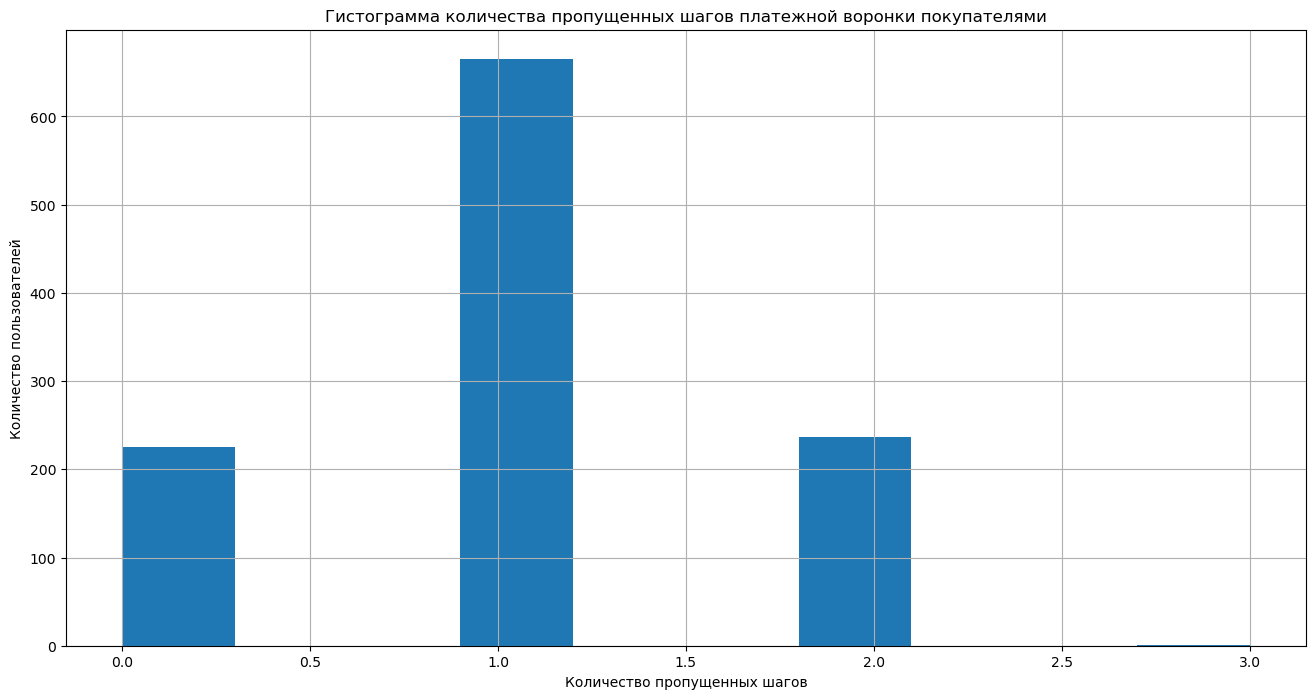

In [63]:
# Используется метод построения диаграмм hist из библиотеки matplotlib с размером figsize=16х8:
number_of_steps['missed_steps'].hist(figsize=(16,8))

# Подпись диаграммы
plt.title('Гистограмма количества пропущенных шагов платежной воронки покупателями')

# Подпись оси Х
plt.xlabel('Количество пропущенных шагов')

# Подпись ости Y
plt.ylabel('Количество пользователей')

# Вывод гистограммы с заданными параметрами
plt.show();

Из графика видно, что в большинстве случаев пользователи, которые совершили хотя бы одну и более покупок, пропускают хотя бы один шаг платежной воронки. Иногда, покупатели пропускают и два шага воронки. Это еще раз говорит о том, что в магазине предусмотрена покупка товара минуя любой шаг воронки. Такой подход часто встречается в интернет магазинках. Такими возможностями пользуются постоянные покупатели, которые совершают покупки по заранее созданным шаблонам, спискам избранного товара и пр.

### Проверка соотношения пользователей распределенных между группами внути изучаемого теста

In [ ]:
data_zt = data.pivot_table(index='group', values='user_id', aggfunc='nunique').rename(columns={'user_id':'count_users'})
data_zt['part']=round(data_zt['count_users']/data_zt['count_users'].sum(),2)
data_zt

Из подсчетов видно, что набранные группы не идентичные. Группа А составляет 75%, группа В составляет 25%, от тестируемого набора. Это вполне значимые различия.

### Изучение улучшения каждой метрики не менее, чем на 10% за 14 дней

In [ ]:
conversion = data.pivot_table(index='group', columns='event_name',values='user_id', aggfunc='nunique')
conversion= conversion[['login', 'product_page', 'product_cart', 'purchase']]
conversion2=pd.DataFrame()
conversion2['login_%'] = round((1-(conversion['login']/conversion['login'])),2)*100
conversion2['product_page_%'] = round(-(1-(conversion['product_page']/conversion['login'])),2)*100
conversion2['product_cart_%'] = round(-(1-(conversion['product_cart']/conversion['product_page'])),2)*100
conversion2['purchase_%'] = round(-(1-(conversion['purchase']/conversion['product_cart'])),2)*100


In [ ]:
conversion

In [ ]:
conversion2

В таблице введены значения изменения метрик при переходе по платежной воронке в разрезе групп. Из данных видно, падение относительного показателя количества уникальных пользователей к предыдущему этапу воронки, они указаны отрицательными значениями. Положительными значениями указан прирост метрики, так же к предыдущему значению. Первая метрика с нулевым значением соотносится сама к себе, и является стартовой. Поэтому у нее такое значение.\
Однако, нас интересует изменение метрик в сравнении тестируемых групп между собой. 
- Изменение метрики продуктовой страницы (product_page) между группами составляет 9%. Т.е. в группе В есть прирос данной метрики, по сравнению с группой А.
- Разница метрик продуктовой корзины (product_cart) между группами составила 3%. Причем не в пользу группы В. Т.е. в данной метрике отрицательное изменение
- Конверсия метрики оплаты (purchase) в группе В снизилась на 1% по отношению группе А.

При использовании стороннего калькулятора достоверности А/В-тестирования на сайте:https://mindbox.ru/academy/ab-test-calculator/, были получены следующие результаты:
Расчет размера выборки, при заданных параметрах
- количество вариантов: 2
- средний показатель 50%
- ожидаемый абсолютный прирост: 10%
- достоверность 95%
- мощность 80%
Полученные результаты:
- размер выборки, всего: 785 чел.
- размер каждой группы: 392 чел.

Т.о. при проведении тестирования по минимальному значению одной из групп, результаты окажутся достаточно достоверными.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, все верно. Количество пользователей реально поучаствовавших в тесте намного меньше зарегестрированного количества, но этого количества должно хватить

Кажется, что 10% мы не достигли, чуть подробнее посмотрим это в самой проверке гипотез
</div>

## Исследовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?

Для каждого пользователя посчитаем количество событий в разрезе групп А и В

In [ ]:
count_events = data.pivot_table(index='user_id', columns='group',values='event_name', aggfunc='count').fillna(0)
count_events.describe()

In [ ]:
count_events.boxplot(figsize=(16,8))
plt.title('Диаграмма boxplot, распределение значений количества событий на пользователя в группах А и В')
plt.xlabel('Группы тестирования')
plt.ylabel('Количество событий на пользователя')
plt.show();


In [ ]:
print(f' Распределение 75-ого, 90-ого и 99-ого перцентиля в группе А: {np.percentile(count_events["A"], [75, 90, 99])}')
print(f' Распределение 75-ого, 90-ого и 99-ого перцентиля в группе В: {np.percentile(count_events["B"], [75, 90, 99])}')

По диаграмме boxplot видно, что распределение значений количества событий на пользователя, имеет различный вид. Если в группе А основное распределение до Q3 происходит в пределах 8 событий на пользователя, то в группе В это только 1 событие.\
В 99 процентах случаев, в группе А приходится 18 событий на пользователя. А в группе В только 12.\
При этих данных, выбросов значений данного показателя в группе А меньше, по сравнению с группой В.\
Очень примечательно выглядит статистика группы В по нулевым значениям в количестве событий. В 50% случаев пользователи не совершали ни каких событий с момента регистрации в течении 14-ти дней. В группе А это значение показателя встречается в 25% случаев. Возможно, данное обстоятельство связано с заблаговременной регистрацией пользователей перед новогодними распродажами.\
Если обратится к среднему показателю количества событий на пользователя, то в группе А приходится 5.203730 действий, а в группе В 1.397418, что составляет весьма существенную разницу.\
Попробуем посмотреть на статистику среднего значения событий на пользователя, для всех посетителей в разрезе групп тестирования.

In [ ]:
print("Статистика по группе А:")
print(count_events[count_events["A"] != 0]["A"].describe())
print()
print("Статистика по группе B")
print(count_events[count_events["B"] != 0]["B"].describe())

В результате статистика поменялась естественным образом. В среднем показатель количества событий на пользователя в группе А стало 6.968300 ед., а в группе В 5.518414 ед.\
При этом, в большинстве случаев Q3 группы А увеличился до 9 событий на пользователя, а группы В резко возрос до 7.75 событий.\
Это говорит о том, что показатели активности пользователей группы В весьма приближены к значениям контрольной группы А.

### Как число событий в выборках распределено по дням?

Сформируем датасет *data_events* в котором события будут сгруппированы по датам и посчитано их количество в день с распределением по группам тестирования.

In [ ]:
data_events = data.pivot_table(index='event_dt', columns='group',values='event_name', aggfunc='count').fillna(0)
data_events.T

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data_events.index, y=data_events['B'], name = 'Группа В'))
fig.add_trace(go.Bar(x=data_events.index, y=data_events['A'], name = 'Группа A'))

  
fig.update_layout(
    barmode="stack",
    template = "simple_white",
    title={'text': "График количества событий в день по группам тестирования"},
        width=1000,
    height=500
)
fig.update_xaxes(title_text="Дата"),
fig.update_yaxes(title_text="Количество событий"),
fig.show()

Из диаграммы видно, как распределены события по датам в группах тестирования. Так в группе А, с 2020-12-13 наблюдается существенный рост активности пользователей, и уже с 2020-12-22 рост переходит в снижение.\
Поведение пользователей группы В отличаются. В динамике изменений количества событий в день, не наблюдается такого скачка значений, как в группе А. Здесь, скорее всего общий тренд на снижение активности с локальными всплесками 9, 16, 21 декабря.\
Распределение событий в группе А стримится к равномерному, распределение группы В не равномерно.


### Как меняется конверсия в воронке в выборках на разных этапах?

Проверим конверсию по платежной воронке в разрезе групп тестирования. 

Сформируем два среpа данных, для группа А *ab_events_a* и для группы В *ab_events_b*

In [ ]:
ab_events_a

In [ ]:
ab_events_a = data.query('group == "A"').groupby('event_name').agg({'user_id':'nunique'})\
    .sort_values(by = 'user_id', ascending=False)\
    .reset_index()

In [ ]:
ab_events_b = data.query('group == "B"').groupby('event_name').agg({'user_id':'nunique'})\
    .sort_values(by = 'user_id', ascending=False)\
    .reset_index()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Funnel(
   name = 'Group A',
   y = ab_events_a['event_name'].sort_values(),
   x = ab_events_a['user_id'],
   textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
   name = 'Group B',
   y = ab_events_b['event_name'].sort_values(),
   x = ab_events_b['user_id'],
   textinfo = "value+percent initial+percent previous"))

fig.update_layout(
   template = "simple_white",
   title={'text': "Конверсия переходов по платежной воронке групп тестирования А и В"},
   width=900,
   height=500
)
fig.show()


Из данной воронки уже видны не только, почти идентичные конверсии в группах А и В между этапами входа, страницы выбора товаров, корзины и оплаты, но также заметны неравномерность распределения пользователей между группами.\
В целом конверсии тестируемых групп идентичны общей платежной воронке.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В этом разделе все верно рассчитано и отображено
</div>

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

1. Перед началом тестирования необходимо учитывать неравномерность набора пользователей в группы. В результате набора, группа А превышает группу В на 1376 пользователя.
2. Распределение событий по дням группы В не равномерно, при этом распределение группы А близко к нормальному.
3. Распределение количества событий на пользователя также неравномерно в группе В, в которой присутствуют аномальные выбросы.
4. Запуск тестирования параллельно с маркетинговой акцией.
5. Влияние предпраздничных распродаж.
6. Конверсия по платежной воронке не линейна. Пользователи имею возможность переходить к оплате с любого этапа.

Все вышеизложенные особенности могут влиять негативно на результаты тестирования.

##  Оценка результатов А/В-тестирования

Для проведения однотипных тестов, создадим функцию

In [ ]:
def zt (event1, index1, event2, index2):
   # пропорция успехов в первой группе:
    p1 = event1/index1
   # пропорция успехов во второй группе:
    p2 = event2/index2
   # пропорция успехов в комбинированном датасете:
    p_combined = (event1 + event2) / (index1 + index2)
   # разница пропорций в датасетах
    difference = p1 - p2
   # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/index1 + 1/index2))
   # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    return p_value


Для проведения тендера используем датасет *conversion*, который использовали для измерения конверсий 

In [ ]:
conversion

Для проведения z-теста сформулируем гипотезы:\
Н0 - Доля в контрольной группе A равна доле в тестируемой группе B\
Н1 - Доля в контрольной группе A не равна доле в тестируемой группе B\
Уровень значимости α установим на значении 0.05

In [ ]:
test1=zt(conversion.loc['A', 'product_page'], conversion.loc['A', 'login'],
         conversion.loc['B', 'product_page'], conversion.loc['B', 'login'])
alpha = .05 # критический уровень статистической значимости
if test1 < alpha:
   print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
   print(
       'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')  

На самом распространенном событии purchase? после login, доли групп A и B распределении не равномерно и необходимо отвергнуть нулевую гипотезу о равности долей.

In [ ]:
test2=zt(conversion.loc['A', 'product_cart'], conversion.loc['A', 'login'],
         conversion.loc['B', 'product_cart'], conversion.loc['B', 'login'])
alpha = .05 # критический уровень статистической значимости
if test2 < alpha:
   print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
   print(
       'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')  

На событии product_cart, доли групп A и B распределении равномерно и нет основания отвергать нулевую гипотезу о равности долей.

In [ ]:
test3=zt(conversion.loc['A', 'purchase'], conversion.loc['A', 'login'],
         conversion.loc['B', 'purchase'], conversion.loc['B', 'login'])
alpha = .05 # критический уровень статистической значимости
if test3 < alpha:
   print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
   print(
       'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')  

На событии purchase, доли групп A и B распределении равномерно и нет основания отвергать нулевую гипотезу о равности долей.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

В целом гипотезы технически проверены правильно
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Но нужно учесть, что мы проверяем несколько гипотез одновременно и нужно сделать на это поправку
</div>

<div class="alert alert-info"> <b>Коментарий студента:</b>
Провел проверку Бонферрони 
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Да, верно
</div>

Проверим гипотезу о равенстве среднего количества пользователей в каждой паре групп тестирования.

In [ ]:
ab_group_a = conversion.T['A']
ab_group_b = conversion.T['B']

In [ ]:
alpha = 0.05  # критический уровень статистической значимости

results_AB = st.ttest_ind(ab_group_a, ab_group_b)

bonferroni_alpha = alpha / 2  # произведено три сравнения

print('p-значение для сравнения групп А и B: ', results_AB.pvalue)


if results_AB.pvalue < bonferroni_alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B'
    )

Наблюдаемые данные не подтверждают наличие разницы числа пользователей между группами. Т.о. корректировка уровня значимости не требуется. И нет основания считать тесты ложно положительными.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Также куда-то пропали итоговые выводы

</div>

<div class="alert alert-info"> <b>Коментарий студента:</b>
Исправлено.

Странно, но выводы писал... куда они пропали, я не понял...
</div>

## Выводы

В результате проведенной работы были выполнены действия по предобработке полученных данных. А в частности все временные значения были приведены к соответствующему типу данных, проведена работа по обнаружению, пропусков и принятия решения о том, что замена на какие-либо значения не требуется. Проведена работа по поиску явных дубликатов.\
На следующем этапе проведена оценка корректности проведения теста, а также сопоставление данных ТЗ, в результате чего были отброшены ненужные данные, т.к. они могли повлиять на результаты тестирования.\
На этапе исследовательского анализа, проведены изыскания, на предмет однородности распределения выборок в тестируемой и контрольной  группах. Что позволили понять о том, что на очищенных данных, статистические значения выборок весьма приближены друг к другу. Далее проведено исследование на предмет распределения выборок событий по дням в тестируемой и контрольной группах, и сделан вывод о том, что распределение событий в группе А стремится к равномерному, распределение группы В не равномерно.\
На этом же этапе проведено исследование конверсии в воронке в выборках на разных этапах по выбранным когортам. По построенной воронке были сделаны выводы о потерях в конверсиях, на разных ее этапах в группах. А также обнаружены различия в количестве набранных покупателей в группах.\
На завершающем этапе исследовательского анализа выделены особенности данных нужно учесть, прежде чем приступать к A/B-тестированию.
В финале работы было проведено А/В тестирование и сравнены результаты тестов по этапам конверсии воронки. Также проведена проверка Бонферрони, на предмет корректности выбора уровня значимости.\
В результате проведенной работы необходимо отметить, что проведенных А/В тест не отвечает требованиям  ТЗ по выбранному периоду проведения тестирования. Так предновогодние распродажи и общий подъем спроса может влиять на активность покупателей совершать покупки. Наложенная маркетинговая акция на тот же период, что и тест, также может влиять на поведение покупателей. Выборки в тестируемую и контрольную группу были осуществлены неравномерно. А также не удалось набрать таргета по количеству пользователей из определенного региона. Хоть это и позволило провести тест, но он прошел на нижней границе возможного тестирования. Также необходимо отметить отсутствие данных за период с 2020-12-30 по 2021-01-04, что не позволило части набранных покупателей в группы, дожить до конечного лайфтайма.\
По анализу конверсий в воронке не выявлен ожидаемый прирост в группе В по отношению к группе А, что не соответствует основной цели внедрения разработки.\
В завершении работы проведено А/В-тестирование по этапам платежной воронки в тестируемой и контрольных группах. По результатам положительных различий в статистиках не обнаружено.\
Рекомендуется провести повторное тестирование в более подходящий период и выполнить на боле качественном наборе данных и заранее предусмотреть синхронизацию проведения теста без влияния маркетинговой акции.


<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Ты отлично поработал над проектом, технически тему с проверкой гипотез ты хорошо освоил, это важно. Поправь, пожалуйста, по замечания, чтобы я могла принять проект.

Привожу ссылки на статьи по А/В-тестам. Надеюсь, будет интересно) 
    
https://emailsoldiers.ru/blog/12-rules-for-ab-testing
    
https://ppc.world/articles/ab-testirovanie-v-yandeksdirekte-kak-provesti-i-gde-brat-idei/
    
https://in-scale.ru/blog/chto-takoe-ab-testirovanie-i-kak-ego-provesti/

</div>